<a href="https://colab.research.google.com/github/cdixson-ds/DS-Unit-2-Linear-Models/blob/master/LS_DS_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [X] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [X] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [X] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [57]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from datetime import datetime

In [59]:
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)
df['created'].describe()

count                   48817
unique                  48148
top       2016-05-14 01:11:03
freq                        3
first     2016-04-01 22:12:41
last      2016-06-29 21:41:47
Name: created, dtype: object

In [60]:
df['created'].dt.month.value_counts()

6    16973
4    16217
5    15627
Name: created, dtype: int64

In [0]:
#Datetime

train = df[df.created.dt.month < 6]
test = df[df.created.dt.month == 6]

In [62]:
train.shape, test.shape

((31844, 34), (16973, 34))

In [0]:
#arrange target y vectors

target = 'price'
y_train = train[target]
y_test = test[target]

In [64]:
#Get mean baseline

print('Mean Baseline (using 0 features)')
guess = y_train.mean()

Mean Baseline (using 0 features)


In [65]:
#Mean Absolute Train Error

from sklearn.metrics import mean_absolute_error
y_pred_train = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred_train)
print(f'Train Error: {mae:.2f} ')

Train Error: 1201.88 


In [66]:
#Mean Absolute test error

y_pred_test = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred_test)
print(f'Test Error: {mae:.2f}' )

Test Error: 1197.71


In [67]:
#Multiple regression scatterplot

import plotly.express as px

px.scatter_3d(
    train,
    x = 'bathrooms',
    y = 'bedrooms',
    z = 'price',
  title = 'Multiple Regression scatterplot'

)

In [0]:
#trying to figure out transformed target regressor

#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import RobustScaler, OneHotEncoder
#from sklearn.compose import TransformedTargetRegressor, ColumnTransformer, make_column_transformer
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression

#use_col = [col for col in df.columns if col not in ['sample_weight']]
#numerical_features = df[use_col].dtypes == 'float'
#categorical_features = ~numerical_features

#preprocess = make_column_transformer(
#                                    (RobustScaler(), numerical_features),
#                                    (OneHotEncoder(sparse=False), categorical_features)
#)

#rf = RandomForestRegressor(n_estimators=20)

#clf = Pipeline(steps=[
#                      ('preprocess', preprocess),
#                      ('model', rf)
#])

#clf_trans = TransformedTargetRegressor(regressor=clf,
#                                        func=np.log1p,
#                                        inverse_func=np.expm1)


In [68]:
#Re-arrange X features matrices, 

features = ['bedrooms','bathrooms', 'longitude', 'doorman', 'dishwasher',
            'interest_level', 'laundry_in_building', 'pre-war', 
            'dogs_allowed' , 'hardwood_floors', 'laundry_in_unit' , 
            'fitness_center', 'high_speed_internet','new_construction', 
            'exclusive', 'elevator', 'wheelchair_access','roof_deck', 'common_outdoor_space']
print(f'Linear Regression, dependent on: {features}')

X_train = train[features]
X_test = test[features]

Linear Regression, dependent on: ['bedrooms', 'bathrooms', 'longitude', 'doorman', 'dishwasher', 'interest_level', 'laundry_in_building', 'pre-war', 'dogs_allowed', 'hardwood_floors', 'laundry_in_unit', 'fitness_center', 'high_speed_internet', 'new_construction', 'exclusive', 'elevator', 'wheelchair_access', 'roof_deck', 'common_outdoor_space']


In [0]:
#Use one hot encoder to capture interest level

import category_encoders as ce

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
#Fit model

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
y_pred_train = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
print(f'Train Error: {mae:.2f} ')

Train Error: 669.81 


In [0]:
#Why did you re-define this?

#y_train = model.predict(X_train)
#y_test = model.predict(X_test)
#print(y_test, y_train)

In [74]:
#Calculate the difference between each pair of the observed and predicted value
#Take the square of the difference value
#Add each of the squared differences to find the cumulative values
#In order to obtain the average value, divide the cululative value by the total 
#number of items on the list

#MSE of train

from sklearn.metrics import mean_squared_error

MSE_train = mean_squared_error(y_train, y_pred_train)
print(f'Train Mean squared Error: {MSE_train:.2f} ')

Train Mean squared Error: 1136251.26 


In [0]:
#Checking with numpy

#MSE = np.square(np.subtract(y_train, y_pred_train)).mean()
#MSE

In [76]:
#RMSE for train
from math import sqrt

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Train Root Mean squared Error: {RMSE_train:.2f} ')

Train Root Mean squared Error: 1065.95 


In [77]:
#MSE of test

mean_squared_error(y_test, y_pred_test)
print(f'Test Mean squared Error: {MSE_train:.2f} ')

#MSE_test = np.square(np.subtract(y_test, y_pred_test)).mean()
#MSE_test

Test Mean squared Error: 1136251.26 


In [78]:
RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Test Root Mean squared Error: {RMSE_test:.2f} ')

Test Root Mean squared Error: 1763.00 


In [0]:
error = (y_test - model.predict(X_test))

Curious about risiduals plots

In [80]:
#Risiduals plot posted by C. Jakuk
#Risiduals (error) increase as price increases

import plotly.express as px
fig = px.scatter(x=y_test, y=error)
#Add horizontal line at residuals = 0

fig.update_layout(shapes=[dict(type= 'line', yref= 'paper', y0= 0.38, y1=0.38, 
                               xref= 'x', x0=0, x1=16000)])

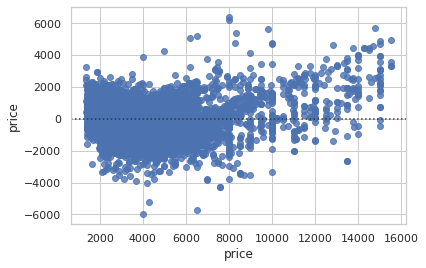

In [81]:
#Risiduals plot with Seaborn

import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

sns.residplot(x=y_test, y=error);

Plotting plane of best fit

In [0]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

def regression_3d(df, x, y, z, num=100, **kwargs):
    """
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
    """
    
    # Plot data
    fig = px.scatter_3d(df, x, y, z, **kwargs)
    
    # Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])    
    
    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    coords = list(itertools.product(xcoords, ycoords))
    
    # Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T
    
    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
    return fig

In [83]:
regression_3d(
      train,
    x = 'bathrooms',
    y = 'bedrooms',
    z = 'price',
  title = 'Plane of best fit'
)

Get Coefficients

In [109]:
#Re-arrange X features matrices, 

features_coef = ['bedrooms','bathrooms']
print(f'Linear Regression, dependent on: {features}')

X_train = train[features]
X_test = test[features]

Linear Regression, dependent on: ['bedrooms', 'bathrooms']


In [0]:
import category_encoders as ce

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [111]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
#Fit model

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
model.intercept_, model.coef_

(485.71869002322273, array([ 389.3248959 , 2072.61011639]))

In [115]:
#unpack syntax

beta0 = model.intercept_
beta1, beta2 = model.coef_
print(f'y = {beta0} + {beta1}x1 + {beta2}x2')

y = 485.71869002322273 + 389.32489590255824x1 + 2072.6101163851895x2


In [116]:
# This is easier to read
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features_coef)
print(coefficients.to_string())

Intercept 485.71869002322273
bedrooms      389.324896
bathrooms    2072.610116
